# Simulation of a discrete difussion process on the grid

## Part 1

### Implementing the function 

In [1]:
import numpy as np
import numba

def diffusion_iteration(un):
    """
    Perform one diffusion step for all given grid points.
    
    Parameters
    ----------
    un : numpy.ndarray
        Numpy array of type `float64` and dimension (N + 2, N + 2) that stores the
        function values at step n.
        
    This function returns a Numpy array of dimension (N + 2, N + 2) of type `float64`
    that contains the function values after performing one step of the above diffusion
    iteration.
    """
    unp1 = np.random.rand(len(un), len(un)) #defining the result un+1 which will be overwritten
    for row_index in range(len(un)):  
        for col_index in range(len(un[row_index])): 
            if (row_index == 0) or (row_index == len(un) - 1) or (col_index == 0) or (col_index == len(un) -1):
                unp1[row_index, col_index] = un[row_index, col_index]  #the boundary values remain constant going from un to unp1
            else:
                unp1[row_index, col_index] = (un[row_index+1, col_index] +un[row_index-1, col_index] + un[row_index, col_index + 1] + un[row_index, col_index-1] )/4 
                #non-boundary values are calculated as averages of neighbouring values for the step unp1
    return unp1



In [2]:
un = np.random.rand(10, 10).astype('float64') 

In [3]:
diffusion_iteration(un) #trying the function

array([[0.57240975, 0.3343906 , 0.2977366 , 0.63638805, 0.30673771,
        0.62696074, 0.1028851 , 0.64315519, 0.84253788, 0.70562567],
       [0.76586149, 0.61655106, 0.35418598, 0.38026075, 0.41398751,
        0.41263458, 0.51178567, 0.63107304, 0.7734677 , 0.86833902],
       [0.16556188, 0.33078509, 0.45305882, 0.47808269, 0.34912957,
        0.55443893, 0.46596053, 0.62802953, 0.54450328, 0.71210837],
       [0.57924506, 0.50044702, 0.39352446, 0.55683834, 0.63821456,
        0.56930501, 0.49553182, 0.55455359, 0.64162789, 0.63705085],
       [0.60637461, 0.50421302, 0.43808948, 0.45993771, 0.69385823,
        0.46201808, 0.59247924, 0.4700404 , 0.56654318, 0.15491165],
       [0.19810714, 0.43393034, 0.48185908, 0.6133454 , 0.44944904,
        0.50380819, 0.25795705, 0.58223377, 0.5629091 , 0.8687352 ],
       [0.36919924, 0.72061818, 0.554572  , 0.4703837 , 0.76788106,
        0.42557983, 0.55474155, 0.40781535, 0.5224658 , 0.1473127 ],
       [0.31360565, 0.36105232, 0.6951799

### Loop in which we generate different size of matrix N and plot against runtime

#### 1. Size of matrix against runtime

In [4]:
import time
sizeArray = [10, 50, 100, 500, 1000, 1500, 2000] # list of sizes of array will remain constant for following functions
timeArray = [] 

for size in sizeArray:
    un = np.random.rand(size, size) #for loop for the size of array N
    
    start = time.time()
    diffusion_iteration(un)
    stop = time.time()
    interval = stop - start
    timeArray.append(interval) #measuring the time taken to run diffusion_iteration
    
    print(f"This took {interval} s")

print(timeArray)

This took 0.00025010108947753906 s
This took 0.00669407844543457 s
This took 0.021381855010986328 s
This took 0.39687108993530273 s
This took 1.5380730628967285 s
This took 3.391177177429199 s
This took 6.144426107406616 s
[0.00025010108947753906, 0.00669407844543457, 0.021381855010986328, 0.39687108993530273, 1.5380730628967285, 3.391177177429199, 6.144426107406616]


#### 2. Resulting plot

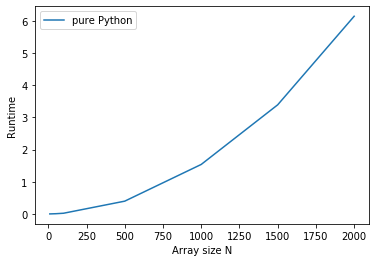

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(sizeArray, timeArray, label = 'pure Python')

plt.xlabel('Array size N')
plt.ylabel('Runtime');
plt.legend()

#### For this nested for loop, I expected the complexity to be O(N^2). The plot confirms this by indicating quadratic function.

## Part 2

### Numba implementation without parallelisation 

#### For this, the function remains the same, only the decorator @njit from Numba is employed. This decorator tells to compile the function in no Python mode. Function is compiled into low-level machine code completely independent of the Python interpreter, resulting in faster performance. 

In [6]:
import numpy as np
import numba

from numba import njit, jit

@njit 
def diffusion_iteration_compiled(un):
    """
    Perform one diffusion step for all given grid points.
    
    Parameters
    ----------
    un : numpy.ndarray
        Numpy array of type `float64` and dimension (N + 2, N + 2) that stores the
        function values at step n.
        
    This function returns a Numpy array of dimension (N + 2, N + 2) of type `float64`
    that contains the function values after performing one step of the above diffusion
    iteration.
    """
    unp1 = np.random.rand(len(un), len(un))
    for row_index in range(len(un)):  
        for col_index in range(len(un[row_index])): 
            if (row_index == 0) or (row_index == len(un) - 1) or (col_index == 0) or (col_index == len(un) -1):
                unp1[row_index, col_index] = un[row_index, col_index]  
            else:
                unp1[row_index, col_index] = (un[row_index+1, col_index] +un[row_index-1, col_index] + un[row_index, col_index + 1] + un[row_index, col_index-1] )/4
    return unp1

In [7]:
import time
timeArray_numba = []

# NEEDS TO BE RUN TWICE FOR OPTIMAL OUTPUT (AND FOR THE FOLLOWING PLOT TO MAKE SENSE)

for size in sizeArray:
    un = np.random.rand(size, size)
    
    start = time.time()
    diffusion_iteration_compiled(un)
    stop = time.time()
    interval = stop - start
    timeArray_numba.append(interval)
    
    print(f"This took {interval} s")

print(timeArray_numba)

This took 1.3562119007110596 s
This took 3.2901763916015625e-05 s
This took 0.00010585784912109375 s
This took 0.003075122833251953 s
This took 0.009524106979370117 s
This took 0.022996902465820312 s
This took 0.03376483917236328 s
[1.3562119007110596, 3.2901763916015625e-05, 0.00010585784912109375, 0.003075122833251953, 0.009524106979370117, 0.022996902465820312, 0.03376483917236328]


#### Time outputs indicate a significant increase in speed of this Numba compiled function as compared to the pure Python function ran in Part 1.

### Numba implementation with parallelisation 

#### Here, @njit decorator is used together with (parallel=True). This allows for parallel executing threads independent of Python interpreter to be created. In the function, range is replaced by prange from Numba to parallelise the for loops.

In [8]:
import numpy as np
import numba

from numba import njit, prange


@njit(parallel=True)
def diffusion_iteration_parallelised(un):
    """
    Perform one diffusion step for all given grid points.
    
    Parameters
    ----------
    un : numpy.ndarray
        Numpy array of type `float64` and dimension (N + 2, N + 2) that stores the
        function values at step n.
        
    This function returns a Numpy array of dimension (N + 2, N + 2) of type `float64`
    that contains the function values after performing one step of the above diffusion
    iteration.
    """
    unp1 = np.random.rand(len(un), len(un))
    for row_index in prange(len(un)):  
        for col_index in prange(len(un[row_index])): 
            if (row_index == 0) or (row_index == len(un) - 1) or (col_index == 0) or (col_index == len(un) -1):
                unp1[row_index, col_index] = un[row_index, col_index]  
            else:
                unp1[row_index, col_index] = (un[row_index+1, col_index] +un[row_index-1, col_index] + un[row_index, col_index + 1] + un[row_index, col_index-1] )/4 
    return unp1

In [9]:
import time
timeArray_par = []

# NEEDS TO BE RUN TWICE FOR OPTIMAL OUTPUT (AND FOR THE FOLLOWING PLOT TO MAKE SENSE)

for size in sizeArray:
    un = np.random.rand(size, size)
    
    start = time.time()
    diffusion_iteration_parallelised(un)
    stop = time.time()
    interval = stop - start
    timeArray_par.append(interval)
    
    print(f"This took {interval} s")

print(timeArray_par)

This took 1.9264898300170898 s
This took 0.00032210350036621094 s
This took 0.0002818107604980469 s
This took 0.0023000240325927734 s
This took 0.006634950637817383 s
This took 0.011592388153076172 s
This took 0.011992216110229492 s
[1.9264898300170898, 0.00032210350036621094, 0.0002818107604980469, 0.0023000240325927734, 0.006634950637817383, 0.011592388153076172, 0.011992216110229492]


#### The actual speed up is always lower than the theoretical speed up that we expect from the number of physical CPU cores.

### Plot comparing numba compiled and parallelised function speeds

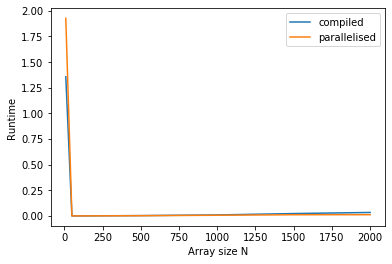

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(sizeArray, timeArray_numba, label = 'compiled')
plt.plot(sizeArray, timeArray_par, label = 'parallelised')
plt.xlabel('Array size N')
plt.ylabel('Runtime')
plt.legend()




####  The plot shows that for large enough values of N parallelised function runs faster than the compiled function without parallelisation.

# Part 3

## Animation of diffusion process

### Initial distribution


In [10]:
import numpy as np
import matplotlib.pyplot as plt

u0_row1 = np.linspace(50000, 50000, 100, dtype=np.float64)
u0 = np.zeros((100, 100))
u0

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
u0[50] = u0_row1
u0[50, 0] = 0 #Changing the 1st element of 50th row to 0 as stated in the boundary condition
u0[50, -1] = 0 #Changing the last element of 50th row to 0 as stated in the boundary condition
u0

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

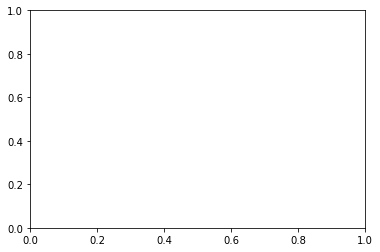

In [12]:
fig, ax = plt.subplots()

In [13]:
ax.imshow(u0)

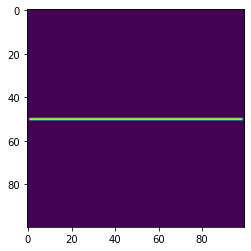

In [14]:
fig #image of the initial distribution 

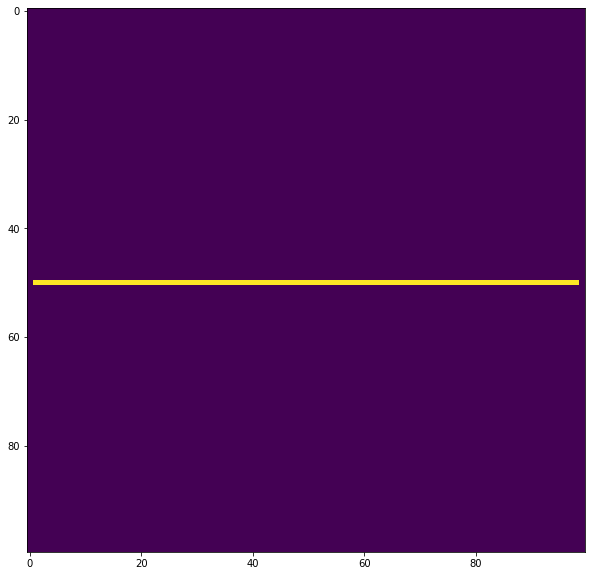

In [29]:
%matplotlib inline
# !conda install -c conda-forge ffmpeg # Install the movie maker
import random
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.animation as animation
from IPython.display import HTML

fps = 1
nSeconds = 10

#First set up the figure, the axis, and the plot element we want to animate

fig = plt.figure(figsize=(10,10))
u_3dArray = [u0]

im = plt.imshow(u0, interpolation='none', aspect='auto', vmin=0, vmax=1)


def animate_func(i):
    # Append u_3dArray with output of diffusion function
    u_3dArray.append(diffusion_iteration(u_3dArray[i]))
    
    im.set_array(u_3dArray[i])
    return [im]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = nSeconds * fps,
                               interval = 1000 / fps, # in ms
                               )


HTML(anim.to_html5_video())

# Advanced Problem

#### Here, another function is added to the initial diffusion_iteration. It keeps track of the input indices that will be kept constant.

In [15]:
from numba import njit, prange


@njit
def diffusion_iteration_advanced(un, *args): 
    """
    Perform one diffusion step for all given grid points.
    
    Parameters
    ----------
    un : numpy.ndarray
        Numpy array of type `float64` and dimension (N + 2, N + 2) that stores the
        function values at step n.
        
    This function returns a Numpy array of dimension (N + 2, N + 2) of type `float64`
    that contains the function values after performing one step of the above diffusion
    iteration.
    """
    unp1 = np.random.rand(len(un), len(un))
    for row_index in prange(len(un)):
        for col_index in prange(len(un[row_index])):
            if (row_index == 0) or (row_index == len(un) - 1) or (col_index == 0) or (col_index == len(un) -1): 
                unp1[row_index, col_index] = un[row_index, col_index]
            else:
                unp1[row_index, col_index] = (un[row_index+1, col_index] +un[row_index-1, col_index] + un[row_index, col_index + 1] + un[row_index, col_index-1])/4
    for index in args:
        unp1[index[0], index[1]] = un[index[0], index[1]]
    
    return unp1

In [16]:
un = np.random.rand(100,100)

diffusion_iteration_advanced(un, (5,5), (6,5))


array([[0.60230964, 0.85261479, 0.79392337, ..., 0.48877886, 0.52118983,
        0.10143283],
       [0.30202607, 0.53376637, 0.62391882, ..., 0.38578605, 0.50935929,
        0.47198253],
       [0.8776202 , 0.50609979, 0.37324378, ..., 0.34492534, 0.50183357,
        0.98343023],
       ...,
       [0.7793628 , 0.5761378 , 0.43171971, ..., 0.36872654, 0.52520525,
        0.8582135 ],
       [0.88934373, 0.46792159, 0.65839398, ..., 0.70112037, 0.35529641,
        0.19952553],
       [0.97696266, 0.69750197, 0.90194636, ..., 0.93121555, 0.66813869,
        0.34426192]])

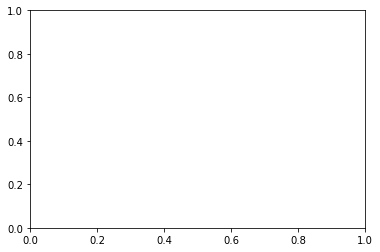

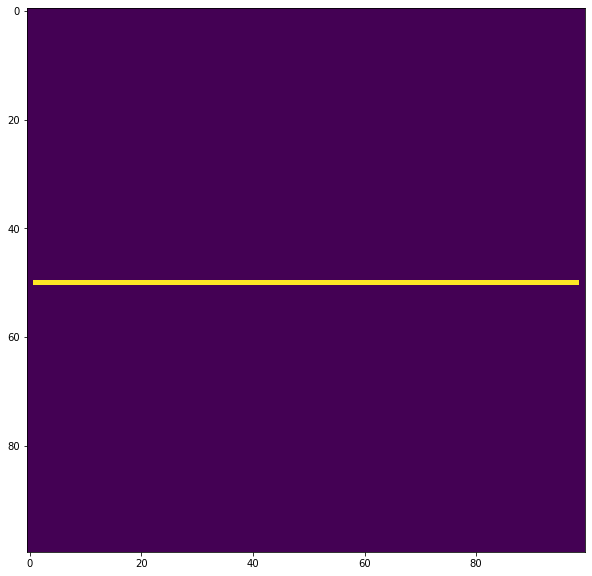

In [17]:
%matplotlib inline

import random
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots()

fps = 1
nSeconds = 10

# First set up the figure, the axis, and the plot element we want to animate

fig = plt.figure(figsize=(10,10))
u_3dArray = [u0]

im = plt.imshow(u0, interpolation='none', aspect='auto', vmin=0, vmax=1)


def animate_func(i):
    # Append u_3dArray with output of diffusion function)
    u_3dArray.append(diffusion_iteration_advanced(u_3dArray[i], (50,10), (50,11), (50,12), (51,10), (53,10), (52,10)))
    
    im.set_array(u_3dArray[i])
    return [im]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = nSeconds * fps,
                               interval = 1000 / fps, # in ms
                               )


HTML(anim.to_html5_video())